# Um exemplo de MCMC

Vamos ver na pratica a criação de um "amostrador" resolvendo o problema de ajustar uma função a um conjunto de dados. Neste exemplo simplificado vamos tentar ajustar uma reta aos dados abaixo:

 
1.698 x + 4.264


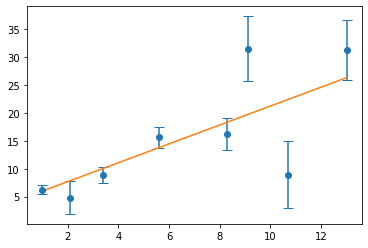

In [98]:
import numpy as np
import matplotlib.pyplot as plt


xobs = np.array([1.,2.1,3.4,5.6,8.3,9.1,10.7,13.0])
yobs = np.array([6.24724,4.78879,8.82746,15.6056,16.2351,31.5331,8.88331,31.3041])
yobs_er = np.array([0.74,2.91,1.47,1.90,2.86,5.83,6.01,5.31]) #  30% error

plt.errorbar(xobs,yobs, yobs_er, fmt='o', capsize=5)

# ajustando com funções python
z = np.polyfit(xobs, yobs, 1, w=1./yobs_er)
ajuste = np.poly1d(z)

plt.plot(xobs,ajuste(xobs))

print(ajuste)

Para resolver este problema precisamos definir algumas funções para simplificar a codificação. Para realizar a amostragem vamos usar o esquema básico de Metropolis–Hastings (https://en.wikipedia.org/wiki/Metropolis%E2%80%93Hastings_algorithm). Neste esquema precisamos definir a função verosemelhança do problema e a função de probabilidade que será usada para as amostragens propostas.

In [106]:
def likelihood(x, y,yerr,a,b):
    # definição do problema de ajuste de uma reta y=ax+b
    
    L = 1.
    for i in range(x.size):
        L *= np.exp(-0.5*(y[i]-(a*x[i]+b))**2/yerr[i]**2)
        #print(np.exp(-0.5*(y[i]-(a*x[i]+b))**2/yerr[i]**2))
        
#    if (np.isfinite(L) == False):
#        L = 0.
    if (b<3. or b>5.):
        L=1.e-300
        
    return L

def proposal(a,b):
    P = 1.
    return P


Com as funções definidas montamos o amostrador:

(array([1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+0

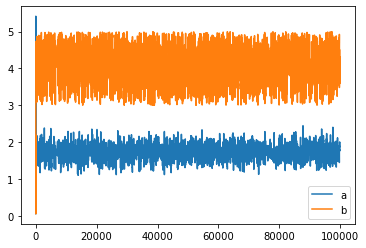

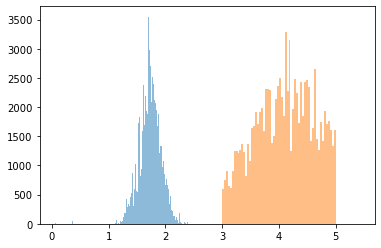

In [107]:
MCsize = 100000

# vetores para receberem os passos gerados
am = np.zeros(MCsize)
bm = np.zeros(MCsize)

# vetor para receber as verosemelhanças calculadas
lik = np.zeros(MCsize)

for i in range(MCsize):
    
    # assumimos uma função proposta uniforme
    am_prop = np.random.uniform(0,6)
    bm_prop = np.random.uniform(0,6)
    
    if (i ==0):
        # este é o ponto inicial da cadeia
        am[i] = am_prop
        bm[i] = bm_prop
        continue

    # calcula a razão verosemelhança 
    a1 = likelihood(xobs, yobs, yobs_er, am_prop, bm_prop) / likelihood(xobs, yobs, yobs_er, am[i-1], bm[i-1])
    
    if (np.isfinite(a1) == False):
        a1 = 1
    
    # calcula a razão da proposta
    a2 = proposal(am_prop, bm_prop) / proposal(am[i-1], bm[i-1])
    
    a = a1*a2
    
    if(a > 1.):
        am[i] = am_prop
        bm[i] = bm_prop
    else:
        # aceite aleatoriamente um passo com base na probabilidade a
        prob = np.random.rand()
        if(prob < a):
            am[i] = am_prop
            bm[i] = bm_prop
        else:
            am[i] = am[i-1]
            bm[i] = bm[i-1]
            
    #print(a1,a2,a,am[i],bm[i])


# plota a cadeia
plt.figure()
plt.plot(am,label='a')
plt.plot(bm,label='b')
plt.legend()


plt.figure()
plt.hist(am,bins='auto',label='a',alpha=0.5)            
plt.hist(bm,bins='auto',label='b',alpha=0.5)            
    
    
            
            


In [108]:
print(np.mean(am),np.mean(bm))
print(np.std(am),np.std(bm))


1.734669916271099 4.090860115833031
0.19275022680003442 0.5124183824166605


In [55]:
likelihood(xobs, yobs, yobs_er, 1.9,4)

0.8957493838427694
0.5460310787622441
0.539730979873098
0.5623981185136663
0.6574911718148637
0.5810564069987819
0.6278624886556575
0.9899373045935548


0.035253767341508715